# Упражнение: Интерактивная диаграмма в Альтаире

Создайте диаграмму рассеяния с выбранными вами размерами набора данных фильмов, которые вы можете очистить, и сложенную гистограмму, которая фильтруется в соответствии с кистью.

Вот как должна выглядеть ваша составная гистограмма:


![Stacked Histogram](stacked_hist.png)

ВАРИАНТ 3

5.1 Реализовать графики в Altair с использованием следующих ключей:

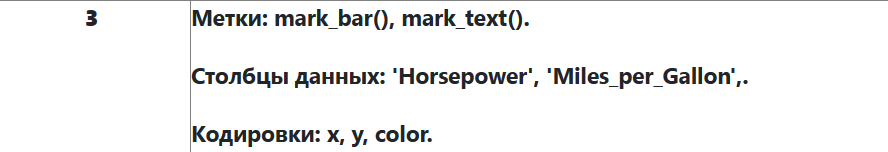

Установим необходимые модули:

In [2]:
!pip3 install altair

In [3]:
!pip3 install vega_datasets

Импортируем пакет Altair:

In [4]:
import altair as alt

Теперь воспользуемся пакетом vega_datasets, чтобы загрузить набор данных:

In [5]:
from vega_datasets import data

cars = data.cars()
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [6]:
chart = alt.Chart(cars)

chart1 = chart.mark_bar().encode(
    x='Origin',
    y='Horsepower',
    color='Origin:N'
)

chart1

alt.Chart(...)

In [7]:
chartt = alt.Chart(cars)
chart2 = chartt.mark_text().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    text='Origin',
    color='Origin'
).interactive()

chart2

alt.Chart(...)

5.2. Используя данные об автомобилях, создайте диаграмму рассеяния (*scatter-plot*), на которой *размер* (*size*) точек становится больше при наведении на них курсора.


In [8]:
single = alt.selection_single(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin:N',
     tooltip=['Name','Miles_per_Gallon','Horsepower'],
    size=alt.condition(single, alt.SizeValue(200),alt.SizeValue(20))
).add_selection(
    single
)

alt.Chart(...)

In [9]:
chart = alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size=alt.Size('Horsepower', legend=None),
    color='Origin'
).interactive()
chart

alt.Chart(...)


5.3. Используя данные об автомобилях, создайте двухпанельную (*two-panel*) гистограмму (количество миль на галлон на одной панели, количество лошадиных сил на другой), где вы можете перетащить мышь, чтобы выбрать данные на левой панели, чтобы отфильтровать данные на второй панели.

In [10]:
selection = alt.selection_multi(fields=['Origin'], bind='legend')

chart = alt.Chart(cars).mark_bar(size=50).encode(
color='Origin',
opacity=alt.condition(selection, alt.value(1), alt.value(0))
).properties(
height=200, width=300
).add_selection(
selection
)

chart.encode(x='Horsepower') | chart.encode(x='Miles_per_Gallon')

# возможность отображения данных по выбору страны

alt.HConcatChart(...)

5.4. Измените приведенный выше пример диаграммы разброса и гистограммы, чтобы

- панорамировать и увеличивать диаграмму рассеяния;
- гистограмма отражала только те точки, которые видны в данный момент.

In [11]:
single = alt.selection_single(on='mouseover', nearest=True)

alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin:N',
     tooltip=['Name','Miles_per_Gallon','Horsepower'],
    size=alt.condition(single, alt.SizeValue(200),alt.SizeValue(20))
).add_selection(
    single
).interactive()

alt.Chart(...)

In [41]:

brush = alt.selection_interval(bind='scales')

selector_brush = alt.selection_interval()
chart = alt.Chart(cars).mark_circle(size=60).encode(
    x=alt.X('Horsepower', scale=alt.Scale(zero=False)),
    y=alt.Y('Miles_per_Gallon', scale=alt.Scale(zero=False)),
    tooltip=['Name', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
    color=alt.condition(selector_brush, alt.value('green'), alt.value('lightgray'))
).properties(
    title='Интерактивный график'
).add_selection(
    brush
).add_selection(
    selector_brush
).interactive()

mpg_hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=True),
    y='count()',
    color=alt.condition(selector_brush, alt.value('green'), alt.value('black'))
).transform_filter(
    brush
).add_selection(
    selector_brush
)

hp_hist = alt.Chart(cars).mark_bar().encode(
    x=alt.X('Horsepower:Q', bin=True),
    y='count()',
    color=alt.condition(selector_brush, alt.value('green'), alt.value('black'))
).transform_filter(
    brush
).add_selection(
    selector_brush
)

two_panel_hist = alt.hconcat(mpg_hist, hp_hist)
chart | two_panel_hist



alt.HConcatChart(...)

5.5. Создайте диаграмму на основе самостоятельно сгенерированных данных и постройте кривые синуса и косинуса с помощью `transform_calculate`.

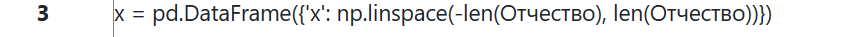

In [12]:
import pandas as pd
import numpy as np


In [16]:
x= pd.DataFrame({'x': np.linspace(-len('Сергеевна'), len('Сергеевна'))})



In [19]:
chart = alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
).mark_line().encode(
    x='x:Q',
    y='sin:Q',
    color=alt.value('green')
).properties(
    title='Sin, Cos'
) + alt.Chart(x).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
).mark_line().encode(
    x='x:Q',
    y='cos:Q',
    color=alt.value('black')
)
chart.display()

alt.LayerChart(...)

5.6. Используйте `transform_filter` на диаграмме задания 4 и удалите области графика, где значение кривой косинуса меньше значения кривой синуса.

In [28]:
 filter_chart = alt.Chart(x).mark_line().encode(
    x='x:Q'
).transform_calculate(
    sin='sin(datum.x)',
    cos='cos(datum.x)'
)
filter_sin = filter_chart.encode(
    y='sin:Q',
    color=alt.value('green')
)
filter_cos = filter_chart.transform_filter(
    (alt.datum.cos <= alt.datum.sin)
).encode(
    y='cos:Q'
)

filtered_chart = filter_sin + filter_cos
filtered_chart

alt.LayerChart(...)

5.7. Используйте любимую визуализацию из предыдущего упражнения и настройте эстетику графика:


- настроить вид меток (`size`, `strokewidth` и т. д.).

- изменить оси и названия графика.

- изменить пределы `x` и `y`

In [29]:
chart = alt.Chart(cars).mark_circle(size=60).encode(
    x=alt.X('Horsepower', axis=alt.Axis(title='Мощность двигателя (л.с.)'), scale=alt.Scale(domain=(0, 400))),
    y=alt.Y('Miles_per_Gallon', axis=alt.Axis(title='Миль на галлон'), scale=alt.Scale(domain=(0, 50))),
    size=alt.Size('Horsepower', legend=None),
    color=alt.Color('Origin', legend=alt.Legend(title='Происхождение')),
).properties(
    title='Распределение Мощности по Милям на Галлон',
    width=600,
    height=400
).interactive()

chart

alt.Chart(...)

5.8. Используйте завершение табуляции в `alt.Chart.configure_`, чтобы увидеть различные параметры конфигурации, затем используйте `?`, чтобы увидеть документацию по функциям.

In [33]:
alt.Chart.configure

<function altair.vegalite.v4.schema.mixins.ConfigMethodMixin.configure(self, arc=Undefined, area=Undefined, aria=Undefined, autosize=Undefined, axis=Undefined, axisBand=Undefined, axisBottom=Undefined, axisDiscrete=Undefined, axisLeft=Undefined, axisPoint=Undefined, axisQuantitative=Undefined, axisRight=Undefined, axisTemporal=Undefined, axisTop=Undefined, axisX=Undefined, axisXBand=Undefined, axisXDiscrete=Undefined, axisXPoint=Undefined, axisXQuantitative=Undefined, axisXTemporal=Undefined, axisY=Undefined, axisYBand=Undefined, axisYDiscrete=Undefined, axisYPoint=Undefined, axisYQuantitative=Undefined, axisYTemporal=Undefined, background=Undefined, bar=Undefined, boxplot=Undefined, circle=Undefined, concat=Undefined, countTitle=Undefined, customFormatTypes=Undefined, errorband=Undefined, errorbar=Undefined, facet=Undefined, fieldTitle=Undefined, font=Undefined, geoshape=Undefined, header=Undefined, headerColumn=Undefined, headerFacet=Undefined, headerRow=Undefined, image=Undefined, legend=Undefined, line=Undefined, lineBreak=Undefined, mark=Undefined, numberFormat=Undefined, padding=Undefined, params=Undefined, point=Undefined, projection=Undefined, range=Undefined, rect=Undefined, rule=Undefined, scale=Undefined, selection=Undefined, square=Undefined, style=Undefined, text=Undefined, tick=Undefined, timeFormat=Undefined, title=Undefined, trail=Undefined, view=Undefined, **kwds)>

In [35]:
alt.Chart.configure?